In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
badminimax = pd.read_csv("scores_badMinimaxVsRand.csv")
minimax = pd.read_csv("scores_MinimaxvsRand.csv")
rand = pd.read_csv("scores_RandvsRand.csv")

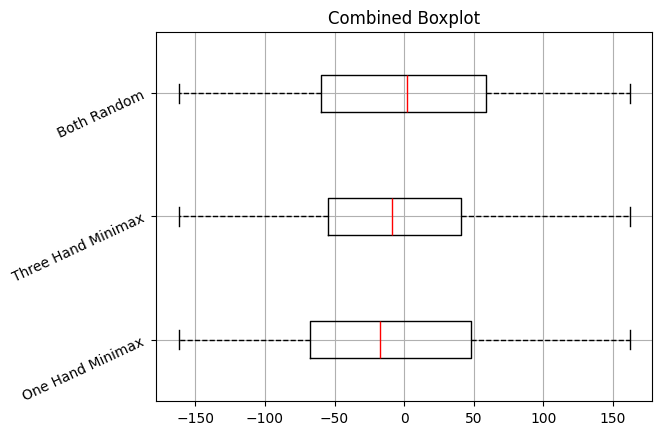

In [4]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([badminimax["diff"], minimax["diff"], rand["diff"]], index=["One Hand Minimax", "Three Hand Minimax", "Both Random"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('Combined Boxplot')
plt.show()

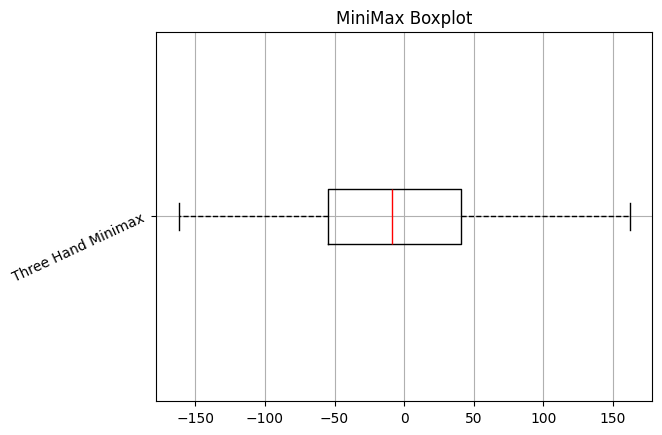

In [5]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([minimax["diff"]], index=["Three Hand Minimax"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('MiniMax Boxplot')
plt.show()

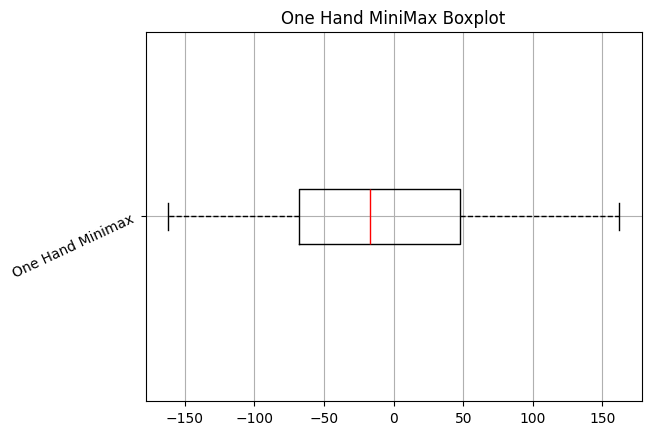

In [6]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([badminimax["diff"]], index=["One Hand Minimax"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('One Hand MiniMax Boxplot')
plt.show()

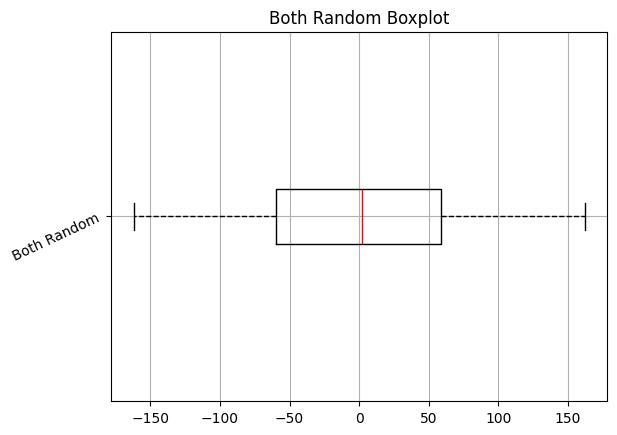

In [7]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([rand["diff"]], index=["Both Random"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('Both Random Boxplot')
plt.show()

In [8]:
auction_scores = pd.read_csv("Auction_Scores_Control.csv")
auction_scores["Round_OurScore"] =  auction_scores["OurScore"] - auction_scores["OurScore"].shift(1)
auction_scores["Round_OurScore"][0] = auction_scores["OurScore"][0]

auction_scores["Round_TheirScore"] =  auction_scores["TheirScore"] - auction_scores["TheirScore"].shift(1)
auction_scores["Round_TheirScore"][0] = auction_scores["TheirScore"][0]

auction_scores = auction_scores[auction_scores["Round_TheirScore"] >= 0]
auction_scores = auction_scores[auction_scores["Round_OurScore"] >= 0]

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17776\3192446979.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  auction_scores["Round_OurScore"][0] = auction_scores["OurScore"][0]
C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17776\3192446979

In [28]:
they_called = auction_scores[auction_scores["WhoCalled"] == 1]

print(f"They Called, Total -> {len(they_called)}")
print(f"They Called, We Won -> {len(they_called[they_called["Round_OurScore"] > they_called["Round_TheirScore"]])}")
print(f"They Called, They Won -> {len(they_called[they_called["Round_OurScore"] < they_called["Round_TheirScore"]])}")

we_called = auction_scores[auction_scores["WhoCalled"] == 0]

print(f"We Called, Total -> {len(we_called)}")
print(f"We Called, We Won -> {len(we_called[we_called["Round_OurScore"] > we_called["Round_TheirScore"]])}")
print(f"We Called, They Won -> {len(we_called[we_called["Round_OurScore"] < we_called["Round_TheirScore"]])}")

we_called_big = auction_scores[auction_scores["WhoCalled"] == 0]
we_called_big = we_called_big[we_called_big["Value"] >= 14]


print(f"We Called, Total -> {len(we_called_big)}")
print(f"We Called, We Won -> {len(we_called_big[we_called_big["Round_OurScore"] > we_called_big["Round_TheirScore"]])}")
print(f"We Called, They Won -> {len(we_called_big[we_called_big["Round_OurScore"] < we_called_big["Round_TheirScore"]])}")

they_called_big = auction_scores[auction_scores["WhoCalled"] == 1]
they_called_big = they_called_big[they_called_big["Value"] >= 14]


print(f"We Called, Total -> {len(they_called_big)}")
print(f"We Called, We Won -> {len(they_called_big[they_called_big["Round_OurScore"] > they_called_big["Round_TheirScore"]])}")
print(f"We Called, They Won -> {len(they_called_big[they_called_big["Round_OurScore"] < they_called_big["Round_TheirScore"]])}")


They Called, Total -> 233
They Called, We Won -> 110
They Called, They Won -> 123
We Called, Total -> 307
We Called, We Won -> 186
We Called, They Won -> 121
We Called, Total -> 13
We Called, We Won -> 5
We Called, They Won -> 8
We Called, Total -> 13
We Called, We Won -> 10
We Called, They Won -> 3


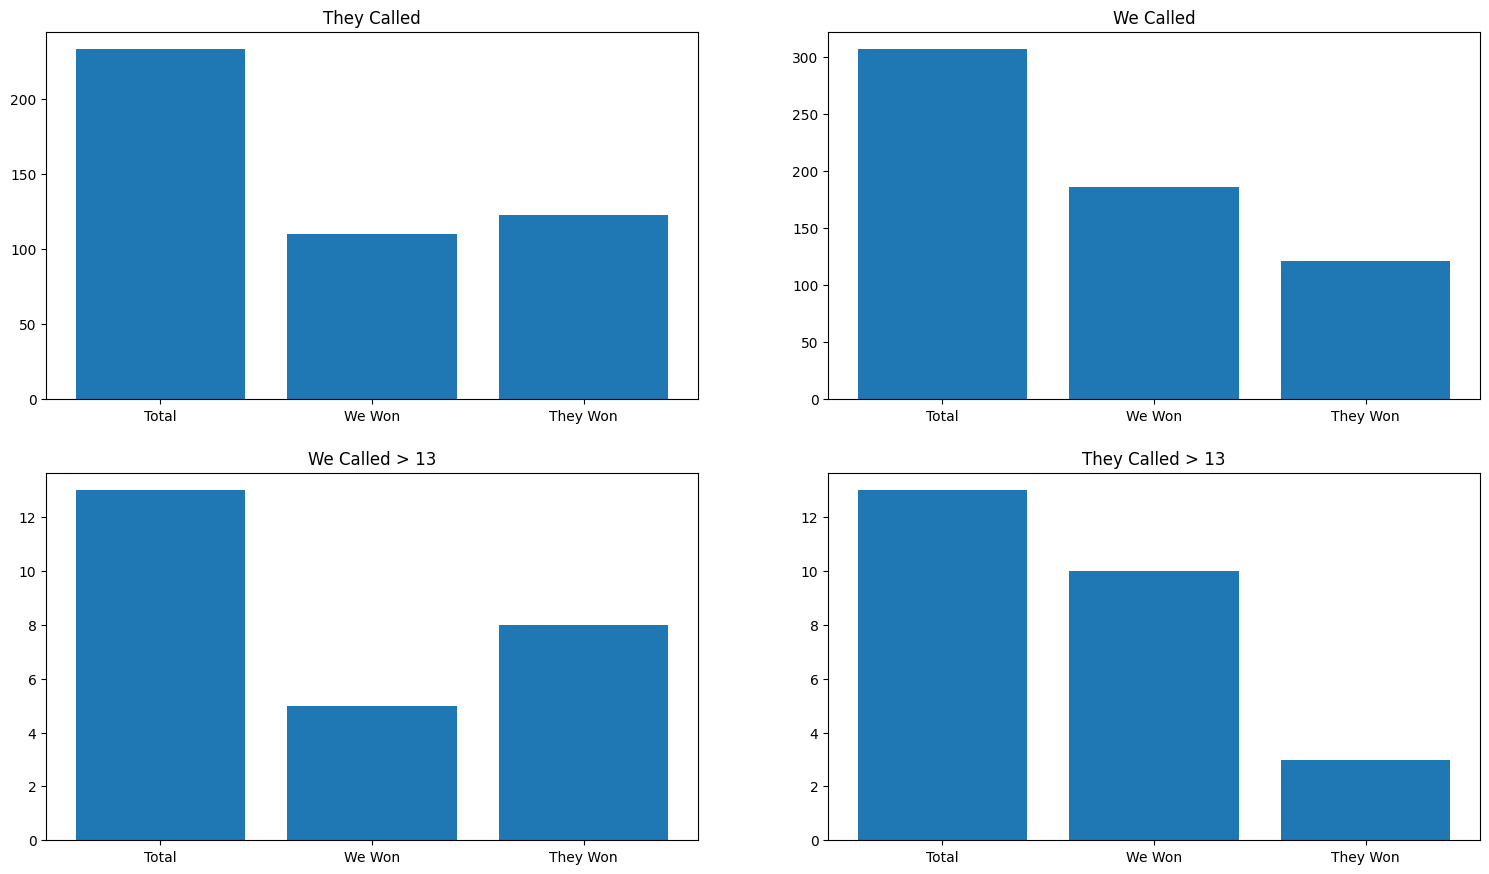

In [ ]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(18.5,10.5)

ax[0, 0].bar(["Total", "We Won", "They Won"], [len(they_called), len(they_called[they_called["Round_OurScore"] > they_called["Round_TheirScore"]]), len(they_called[they_called["Round_OurScore"] < they_called["Round_TheirScore"]])])
ax[0, 0].set_title("They Called")

ax[0, 1].bar(["Total", "We Won", "They Won"], [len(we_called), len(we_called[we_called["Round_OurScore"] > we_called["Round_TheirScore"]]), len(we_called[we_called["Round_OurScore"] < we_called["Round_TheirScore"]])])
ax[0, 1].set_title("We Called")

ax[1, 0].bar(["Total", "We Won", "They Won"], [len(we_called_big), len(we_called_big[we_called_big["Round_OurScore"] > we_called_big["Round_TheirScore"]]), len(we_called_big[we_called_big["Round_OurScore"] < we_called_big["Round_TheirScore"]])])
ax[1, 0].set_title("We Called > 13")

ax[1, 1].bar(["Total", "We Won", "They Won"], [len(they_called_big), len(they_called_big[they_called_big["Round_OurScore"] > they_called_big["Round_TheirScore"]]), len(they_called_big[they_called_big["Round_OurScore"] < they_called_big["Round_TheirScore"]])])
ax[1, 1].set_title("They Called > 13")
plt.show()

In [21]:
v1v2 = pd.read_csv("Auction_Scores_v1_v2.csv")
v1v2["Round_v1"] =  v1v2["v2"] - v1v2["v2"].shift(1)
v1v2["Round_v1"][0] = v1v2["v2"][0]

v1v2["Round_v2"] =  v1v2["v1"] - v1v2["v1"].shift(1)
v1v2["Round_v2"][0] = v1v2["v1"][0]

v1v2 = v1v2[v1v2["Round_v1"] >= 0]
v1v2 = v1v2[v1v2["Round_v2"] >= 0]

C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17776\1485185898.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  v1v2["Round_v1"][0] = v1v2["v2"][0]
C:\Users\Hovgr\AppData\Local\Temp\ipykernel_17776\1485185898.py:3: SettingWithCopyWarning: 


In [29]:
they_called = v1v2[v1v2["WhoCalled"] == 1]

print(f"v1 Called, Total -> {len(they_called)}")
print(f"v1 Called, v2 Won -> {len(they_called[they_called["Round_v2"] > they_called["Round_v1"]])}")
print(f"v1 Called, v1 Won -> {len(they_called[they_called["Round_v2"] < they_called["Round_v1"]])}")

we_called = v1v2[v1v2["WhoCalled"] == 0]

print(f"v2 Called, Total -> {len(we_called)}")
print(f"v2 Called, v2 Won -> {len(we_called[we_called["Round_v2"] > we_called["Round_v1"]])}")
print(f"v2 Called, v1 Won -> {len(we_called[we_called["Round_v2"] < we_called["Round_v1"]])}")

we_called_big = v1v2[v1v2["WhoCalled"] == 0]
we_called_big = we_called_big[we_called_big["Value"] >= 13]


print(f"v2 Called, Total -> {len(we_called_big)}")
print(f"v2 Called, v2 Won -> {len(we_called_big[we_called_big["Round_v2"] > we_called_big["Round_v1"]])}")
print(f"v2 Called, v1 Won -> {len(we_called_big[we_called_big["Round_v2"] < we_called_big["Round_v1"]])}")

they_called_big = v1v2[v1v2["WhoCalled"] == 1]
they_called_big = they_called_big[they_called_big["Value"] >= 13]


print(f"v1 Called, Total -> {len(they_called_big)}")
print(f"v1 Called, v2 Won -> {len(they_called_big[they_called_big["Round_v2"] > they_called_big["Round_v1"]])}")
print(f"v1 Called, v1 Won -> {len(they_called_big[they_called_big["Round_v2"] < they_called_big["Round_v1"]])}")


v1 Called, Total -> 343
v1 Called, v2 Won -> 141
v1 Called, v1 Won -> 202
v2 Called, Total -> 208
v2 Called, v2 Won -> 165
v2 Called, v1 Won -> 43
v2 Called, Total -> 15
v2 Called, v2 Won -> 13
v2 Called, v1 Won -> 2
v1 Called, Total -> 115
v1 Called, v2 Won -> 59
v1 Called, v1 Won -> 56


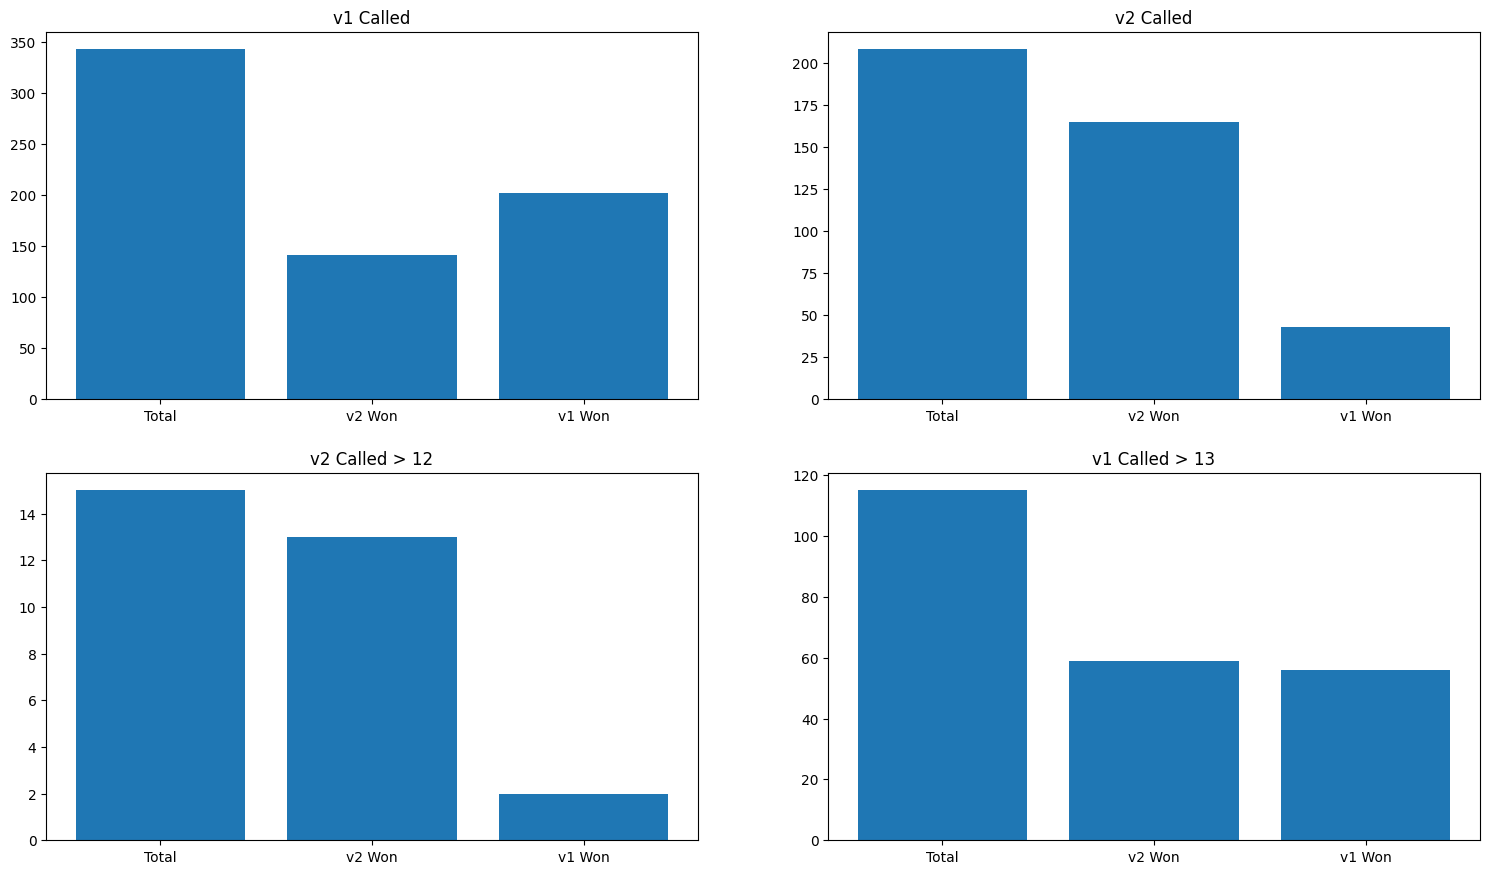

In [24]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(18.5,10.5)

ax[0, 0].bar(["Total", "v2 Won", "v1 Won"], [len(they_called), len(they_called[they_called["Round_v2"] > they_called["Round_v1"]]), len(they_called[they_called["Round_v2"] < they_called["Round_v1"]])])
ax[0, 0].set_title("v1 Called")


ax[0, 1].bar(["Total", "v2 Won", "v1 Won"], [len(we_called), len(we_called[we_called["Round_v2"] > we_called["Round_v1"]]), len(we_called[we_called["Round_v2"] < we_called["Round_v1"]])])
ax[0, 1].set_title("v2 Called")

ax[1, 0].bar(["Total", "v2 Won", "v1 Won"], [len(we_called_big), len(we_called_big[we_called_big["Round_v2"] > we_called_big["Round_v1"]]), len(we_called_big[we_called_big["Round_v2"] < we_called_big["Round_v1"]])])
ax[1, 0].set_title("v2 Called > 12")

ax[1, 1].bar(["Total", "v2 Won", "v1 Won"], [len(they_called_big), len(they_called_big[they_called_big["Round_v2"] > they_called_big["Round_v1"]]), len(they_called_big[they_called_big["Round_v2"] < they_called_big["Round_v1"]])])
ax[1, 1].set_title("v1 Called > 13")
plt.show()
